Installing Julia

In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.5"
export JULIA_PKG_PRECOMPILE_AUTO=0
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  echo "Installing PyCall.jl..."
  julia -e 'using Pkg; Pkg.add("PyCall"); Pkg.build("PyCall")'
  julia -e 'println("Success")'

fi

Installing Julia 1.8.5 on the current Colab Runtime...
2023-08-14 13:12:24 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz [130873886/130873886] -> "/tmp/julia.tar.gz" [1]
Installing PyCall.jl...
  Installing known registries into `~/.julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed VersionParsing ── v1.3.0
   Installed Conda ─────────── v1.9.1
   Installed MacroTools ────── v0.5.10
   Installed JSON ──────────── v0.21.4
   Installed Parsers ───────── v2.7.2
   Installed PyCall ────────── v1.96.1
   Installed Preferences ───── v1.4.0
   Installed PrecompileTools ─ v1.1.2
    Updating `~/.julia/environments/v1.8/Project.toml`
  [438e738f] + PyCall v1.96.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [8f4d0f93] + Conda v1.9.1
  [682c06a0] + JSON v0.21.4
  [1914dd2f] + MacroTools v0.5.10
  [69de0a69] + Parsers v2.7.2
  [aea7be01] + PrecompileTools v1.1.2
  [21216c6a

In [2]:
!pip install julia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 2.0 MB/s eta 0:00:00


In [3]:
from julia import Julia

julia = Julia(compiled_modules=False, threads='auto')
from julia import Main
from julia.tools import redirect_output_streams

redirect_output_streams()

In [4]:
pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.9 MB/s eta 0:00:00


In [5]:
import pysr

# We don't precompile in colab because compiled modules are incompatible static Python libraries:
pysr.install(precompile=False)

Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 22.04.2 LTS
  uname: Linux 5.15.109+ #1 SMP Fri Jun 9 10:57:30 UTC 2023 x86_64 x86_64
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  2200 MHz       1129 s          0 s        165 s        477 s          0 s
       #2  2200 MHz        983 s          0 s        186 s        584 s          0 s
  Memory: 12.678386688232422 GB (11527.13671875 MB free)
  Uptime: 184.44 sec
  Load Avg:  2.51  1.17  0.45
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 1 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_PROJECT = @pysr-0.16.1
  JULIA_PKG_PRECOMPILE_AUTO = 0
  TCLLIBPATH = /usr/share/tcltk/tcllib1.20
  HOME = /root
  PYTHONPATH = /env/python
  LIBRARY_PATH = /usr/local/cuda/lib64/stubs
  PATH 

[ Info: Julia version info
[ Info: Julia executable: /usr/local/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /usr/bin/python3
│     libpython: /usr/lib/x86_64-linux-gnu/libpython3.10.so.1.0
│ Python:
│     python: /usr/bin/python3
└     libpython: 
    Updating registry at `~/.julia/registries/General.toml`
     Cloning git-repo `https://github.com/MilesCranmer/SymbolicRegression.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Tricks ─────────────────────────── v0.1.7
   Installed IrrationalConstants ────────────── v0.2.2
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed ScientificTypesBase ────────────── v3.0.0
   Installed Adapt ──────────────────────────── v3.6.2
   Installed DiffRules ──────────────────────── v1.15.1
   Installed DynamicExpressions 

In [6]:
import sympy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#!gdown --id 1hgB_DUiqLW_V2y2tO58uLSnLgxY-CJVu --output Kuruma_CarPrice.csv

# Read the CSV file using pandas
#Car = pd.read_csv("Kuruma_CarPrice.csv")

In [9]:
# Read the CSV file using pandas
Car = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kuruma_CarPrice.csv")
print(Car.head())

   car_ID  symboling                   CarName fueltype aspiration  \
0       1          3        alfa-romero giulia      gas        std   
1       2          3       alfa-romero stelvio      gas        std   
2       3          1  alfa-romero Quadrifoglio      gas        std   
3       4          2               audi 100 ls      gas        std   
4       5          2                audi 100ls      gas        std   

   doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0           2  convertible        rwd          front       88.6  ...   
1           2  convertible        rwd          front       88.6  ...   
2           2    hatchback        rwd          front       94.5  ...   
3           4        sedan        fwd          front       99.8  ...   
4           4        sedan        4wd          front       99.4  ...   

   enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0         130        mpfi       3.47    2.68              9.0        1

Data Cleaning

In [10]:
#checking for null values
print(Car['CarName'].isnull().sum())

0


In [11]:
Car.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
#dropping the car_ID
Car=Car.drop(['car_ID'],axis=1)

In [14]:
#Splitting the Company name from Car Name column
Company_Name = Car['CarName'].apply(lambda x : x.split(' ')[0])
Car.insert(3,"CompanyName",Company_Name)
Car.drop(['CarName'],axis=1,inplace=True)
Car.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
#Fixing invalid values
Car['CompanyName'] = Car['CompanyName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [16]:
Car['symboling']=Car['symboling'].astype('str')

Categorical Columns

In [17]:
categoricalCols=Car.select_dtypes(include=['object']).columns

Numerical Columns

In [18]:
Car[categoricalCols].head(2)

,symboling,fueltype,CompanyName,aspiration,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,gas,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi
1,3,gas,alfa-romero,std,convertible,rwd,front,dohc,four,mpfi


In [19]:
numericalCols=Car.select_dtypes(exclude=['object']).columns

In [20]:
Car[numericalCols].head(2)

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


Correlation between Target and Input Variables

In [21]:
# Calculate the correlation matrix
correlation_matrix = Car.corr()

# Print the correlation matrix
print(correlation_matrix)

                  doornumber  wheelbase  carlength  carwidth  carheight  \
doornumber          1.000000   0.447357   0.398568  0.207168   0.552208   
wheelbase           0.447357   1.000000   0.874587  0.795144   0.589435   
carlength           0.398568   0.874587   1.000000  0.841118   0.491029   
carwidth            0.207168   0.795144   0.841118  1.000000   0.279210   
carheight           0.552208   0.589435   0.491029  0.279210   1.000000   
curbweight          0.197379   0.776386   0.877728  0.867032   0.295572   
enginesize          0.020742   0.569329   0.683360  0.735433   0.067149   
boreratio           0.119258   0.488750   0.606454  0.559150   0.171071   
stroke             -0.011082   0.160959   0.129533  0.182942  -0.055307   
compressionratio    0.177888   0.249786   0.158414  0.181129   0.261214   
horsepower         -0.126947   0.353294   0.552623  0.640732  -0.108802   
peakrpm            -0.247668  -0.360469  -0.287242 -0.220012  -0.320411   
citympg            -0.012

<ipython-input-21-eb8496a70d4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Car.corr()


In [22]:
Y_COL_NAME = "price"
#X = Car.drop([Y_COL_NAME], axis=1)
X = Car[["enginesize", "horsepower", "carwidth", "curbweight", "carlength", "wheelbase"]]
#X = Car[["enginesize", "horsepower", "curbweight", "carlength", "peakrpm", "citympg", "highwaympg", "doornumber"]]
y = Car[Y_COL_NAME]
print(X)
print(y)

     enginesize  horsepower  carwidth  curbweight  carlength  wheelbase
0           130         111      64.1        2548      168.8       88.6
1           130         111      64.1        2548      168.8       88.6
2           152         154      65.5        2823      171.2       94.5
3           109         102      66.2        2337      176.6       99.8
4           136         115      66.4        2824      176.6       99.4
..          ...         ...       ...         ...        ...        ...
200         141         114      68.9        2952      188.8      109.1
201         141         160      68.8        3049      188.8      109.1
202         173         134      68.9        3012      188.8      109.1
203         145         106      68.9        3217      188.8      109.1
204         141         114      68.9        3062      188.8      109.1

[205 rows x 6 columns]
0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    

In [23]:
# Assuming you have a feature matrix X and a target vector y
# X should be a 2-dimensional array or DataFrame containing the input features
# y should be a 1-dimensional array or Series containing the target variable

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the feature matrix
scaler.fit(X)

MinMaxScaler()

In [24]:
# Transform the feature matrix
X_normalized = scaler.transform(X)

# Note: You can also perform fit_transform in a single step
X_normalized = scaler.fit_transform(X)

# The feature matrix X_normalized is now normalized
# We can use it for car price prediction with a machine learning model


Setting population of expressions

In [25]:
default_pysr_params = dict(
    populations=3000,
    model_selection="best",
)

Creating PySR model and train it

In [26]:
# Learn equations
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["cos", "exp", "sin"],
    population_size=500,  # default 33
    tournament_selection_n=23,  # default 10
    tournament_selection_p=0.8,  # default 0.86
    ncyclesperiteration=500,  # default 550
    parsimony=1e-3,  # default 0.0032
    fraction_replaced_hof=0.08,  # default 0.035
    optimizer_iterations=25,  # default 8
    crossover_probability=0.12,  # default 0.066
    weight_optimize=0.06,  # default 0.0
   # populations=50,  # default 15
    adaptive_parsimony_scaling=100.0,  # default 20
)

model.fit(X, y) #training the model on our dataset

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Started!

Expressions evaluated per second: 8.290e+03
Head worker occupation: 0.0%
Progress: 1 / 450 total iterations (0.222%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.359e+08  1.594e+01  y = enginesize
3           1.995e+07  1.235e+00  y = (wheelbase * enginesize)
5           1.835e+07  4.170e-02  y = ((wheelbase - -9.4622) * enginesize)
7           1.464e+07  1.129e-01  y = (((wheelbase - -53.517) * enginesize) - 6190.1)
9           1.289e+07  6.375e-02  y = ((wheelbase - ((-0.3514 * horsepower) - -35.533)) * engine...
                                  size)
11          1.289e+07  5.960e-08  y = ((wheelbase - ((-1.1282 * (0.31145 * horsepower)) - -35.53...
                                  )) * enginesize)
12          1.286e+07  2.190e-03  y = ((wheelbase - ((cos(wheelbase) - (0.34974 * horsepower)) -...
                                   -35.336)) * engine

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          13279.121   
	1         0.578986                           (wheelbase * enginesize)   
	2         0.197346            ((curbweight * enginesize) / 26.118082)   
	3   >>>>  0.075055  ((curbweight * (enginesize + horsepower)) / 47...   
	4         0.001470  (((curbweight + carlength) * (horsepower + eng...   
	5         0.026436  ((curbweight * (enginesize + horsepower)) / (4...   
	6         0.064953  (((curbweight * enginesize) + exp(0.4545855 / ...   
	7         0.035227  (((curbweight * (enginesize + horsepower)) + (...   
	8         0.042580  (((curbweight * (enginesize + horsepower)) + e...   
	9         0.014691  (((horsepower + (enginesize - -900.27844)) * c...   
	10        0.013153  ((((curbweight - horsepower) * (enginesize + h...   
	11        0.022155  (((curbweight * (enginesize + horsepower)) + e...   
	12        0.053519  (((curbweight * (enginesize + horsepower)) + e...   
	
	          loss  complexity  
	0   63510384.0           1  
	1   19950042.0           3  
	2   13444075.0           5  
	3   11570157.0           7  
	4   11536200.0           9  
	5   11235223.0          10  
	6   10528658.0          11  
	7   10164226.0          12  
	8    9740517.0          13  
	9    9598463.0          14  
	10   9473041.0          15  
	11   9265475.0          16  
	12   8324946.0          18  
]

In [27]:
#To print the learned/discovered equations
print(model)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          13279.121   
	1         0.578986                           (wheelbase * enginesize)   
	2         0.197346            ((curbweight * enginesize) / 26.118082)   
	3   >>>>  0.075055  ((curbweight * (enginesize + horsepower)) / 47...   
	4         0.001470  (((curbweight + carlength) * (horsepower + eng...   
	5         0.026436  ((curbweight * (enginesize + horsepower)) / (4...   
	6         0.064953  (((curbweight * enginesize) + exp(0.4545855 / ...   
	7         0.035227  (((curbweight * (enginesize + horsepower)) + (...   
	8         0.042580  (((curbweight * (enginesize + horsepower)) + e...   
	9         0.014691  (((horsepower + (enginesize - -900.27844)) * c...   
	10        0.013153  ((((curbweight - horsepower) * (enginesize + h...   
	11        0.022155  (((curbweight * (enginesize + horsepower)) + e...   
	12      

In [28]:
#model.predict(X)

In [29]:
model.score(X,y)

0.8178225977927333

In [30]:
#Using SymPy format for the best expression
model.sympy()

0.0211975873753953*curbweight*(enginesize + horsepower)

In [31]:
model.sympy(2)

0.0382876506781777*curbweight*enginesize

In [32]:
#model.equations_

In [33]:
# LaTeX format- visually appealing manner for inclusion in documents or presentations
model.latex()

'0.0212 curbweight \\left(enginesize + horsepower\\right)'

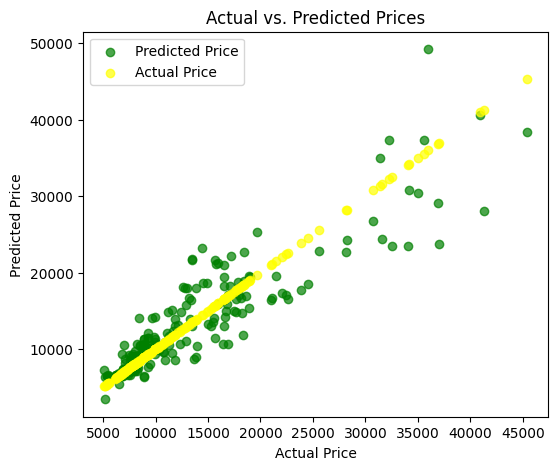

In [34]:
import sympy as sp

#Get the symbolic expression from model.sympy()
symbolic_expression = model.sympy()

#Create a function from the symbolic expression
variables = X.columns.tolist()
func = sp.lambdify(variables, symbolic_expression, "numpy")

#Create a new column to store the predicted values
Car["predicted_price"] = func(*X.to_numpy().T)


# Co-plot the actual price and predicted values
plt.figure(figsize=(6, 5))
plt.scatter(y, Car["predicted_price"], alpha=0.7, label="Predicted Price", color="green")
plt.scatter(y, y, alpha=0.7, label="Actual Price", color="yellow")
#plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Reference Line")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()

In [35]:
#from sklearn.model_selection import train_test_split

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
#model.fit(X_train, y_train)

# Predict the target variable on the test set
#y_pred = model.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Absolute Error)
#from sklearn.metrics import mean_absolute_error

#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)

#Line Plot with Regression Line


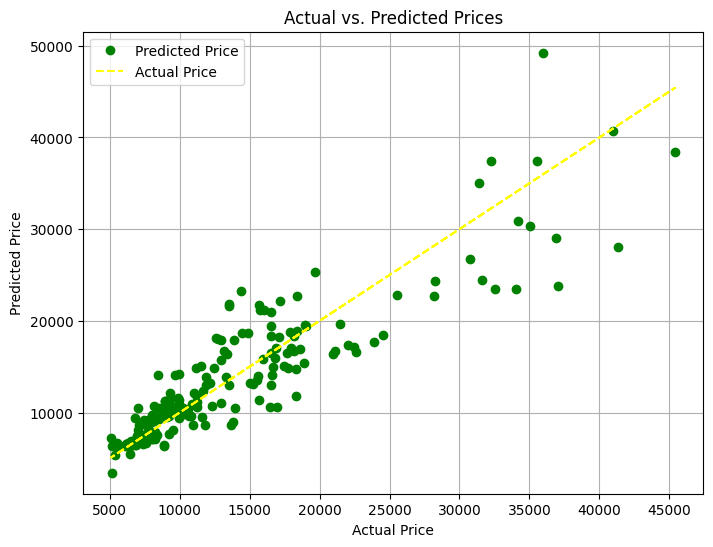

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(y, Car["predicted_price"], 'o', color='green', label="Predicted Price")
plt.plot(y, y, color='yellow', linestyle='--', label="Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


#Residual Plot
This plot helps identify any patterns or biases in the model's predictions.

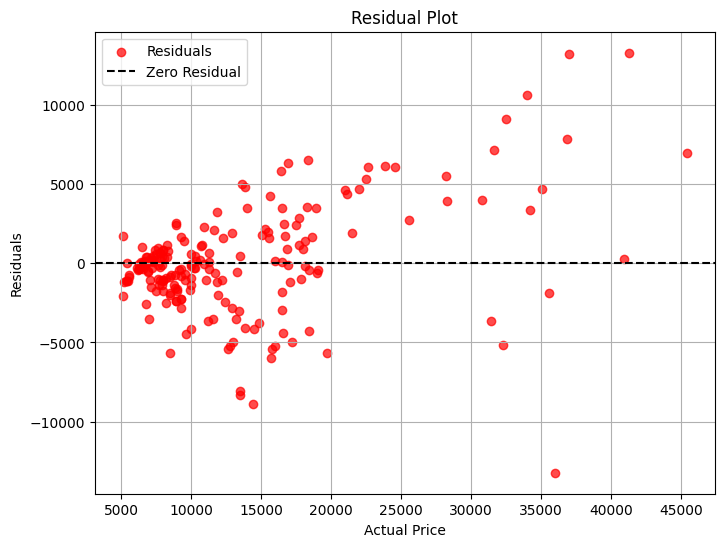

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y - Car["predicted_price"], color='red', alpha=0.7, label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


#Histogram of Residuals
A histogram of the residuals can show the distribution of the prediction errors. This can provide insights into the accuracy and consistency of the model's predictions.

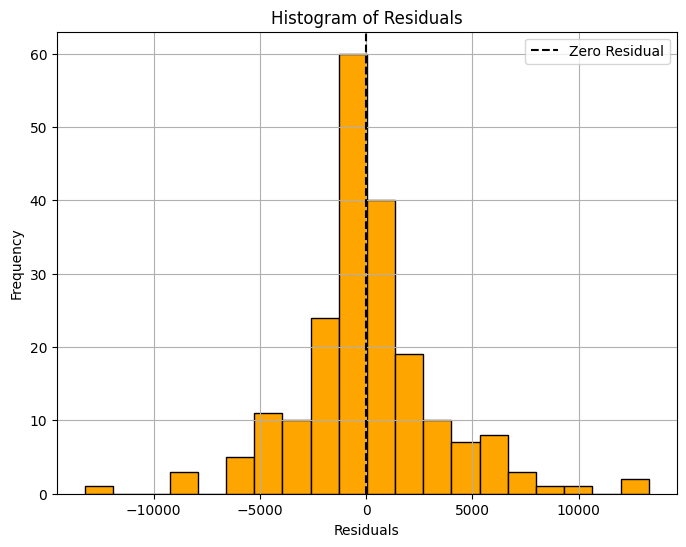

In [38]:
residuals = y - Car["predicted_price"]
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.axvline(x=0, color='black', linestyle='--', label='Zero Residual')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.grid(True)
plt.show()


#Box Plot of Residuals
A box plot can help visualize the spread and distribution of the residuals. It provides information about the variability of the model's predictions.

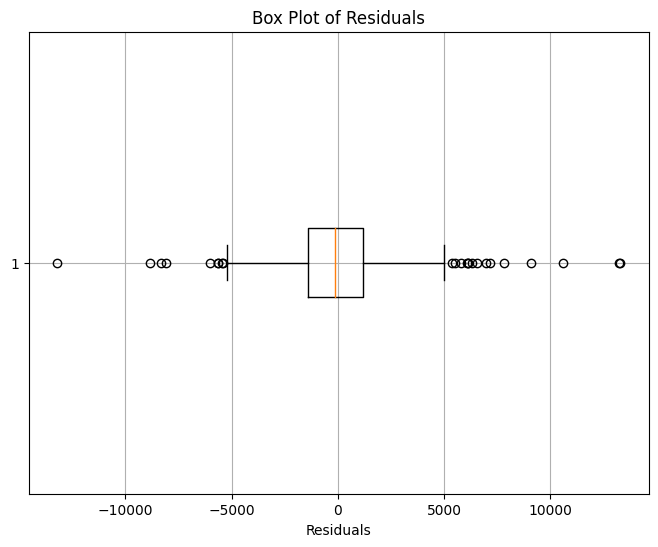

In [39]:

plt.figure(figsize=(8, 6))
plt.boxplot(residuals, vert=False)
plt.xlabel('Residuals')
plt.title('Box Plot of Residuals')
plt.grid(True)
plt.show()
